In [19]:
library(fpp2)
library(gridExtra)

In [ ]:
# 3. 교재 Forecasting: Principles and Practice, 섹션 8.11 (https://otexts.com/fppkr/arimaexercises.html)의 6 번 연습문제에 대해 답하라.
# R을 이용하여 단순한 ARIMA 모델에서 몇몇 데이터를 모사하고 그려봅시다

 Time-Series [1:100] from 1 to 100: 0 0.2472 0.5264 0.8842 0.0247 ...

 0 0.2471882 0.5264185 0.8842473 0.02474317 2.123142 2.440509 2.179766 0.7141942 -0.286675 -0.3557587 0.9372299 -0.7455952 0.9306766 1.166428 1.110432 -0.5602327 -0.7635762 0.5903243 1.393717 0.188664 1.117622 1.378556 1.336965 1.374552 0.2162197 -0.6316044 -1.075756 0.67116 1.095725 0.6774484 0.9734421 1.968399 1.993505 0.1995741 0.8342526 -0.2353922 -1.28226 -0.2384796 1.472197 0.1402216 1.227647 0.48148 -0.6714894 0.6942177 1.014804 2.776019 1.186212 0.5443439 0.715075 0.3981418 -0.01565434 0.1877705 0.3258061 1.919941 1.301449 1.286944 0.07881704 -0.8989387 -2.242711 -1.61633 -0.4092161 2.319732 0.4959283 0.3314579 0.4936195 0.6393322 1.870123 -0.8243948 -0.704676 1.750724 1.249368 -0.4526782 -1.279872 -0.1156218 0.1978755 -0.4844168 -1.48594 -0.3266416 -0.5511473 -0.5364381 -0.6785386 -0.004467431 -0.3047454 -1.582535 -1.124091 0.1169302 -0.2730787 0.4820661 0.2398467 -0.2120724 -0.3208029 -2.857044 -2.014501 -

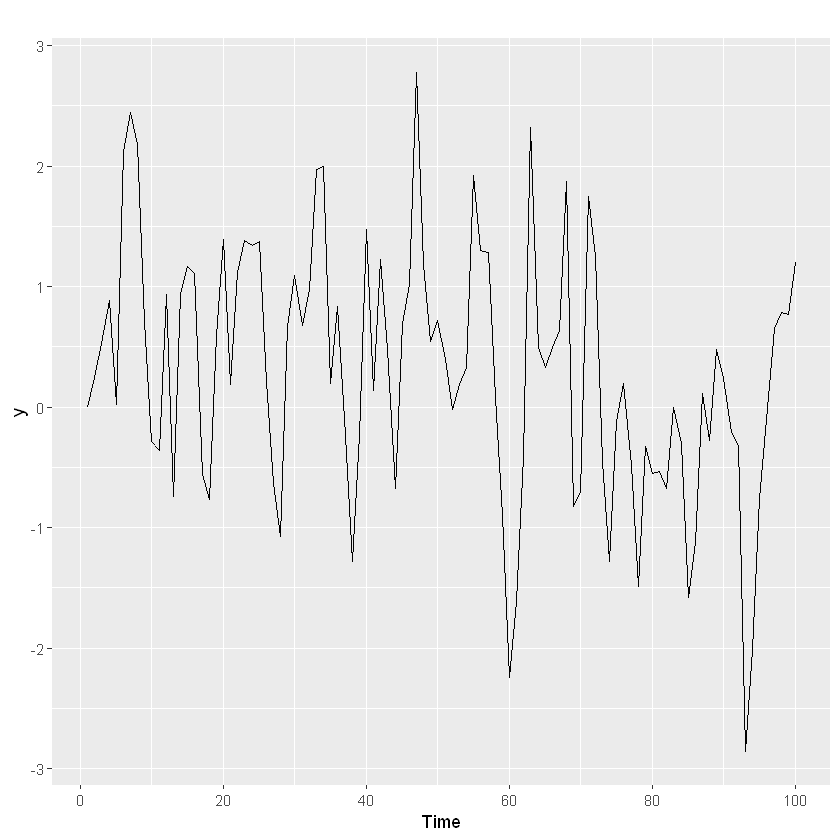

In [14]:
# a. 다음의 R 코드를 이용하여,  Φ_1 = 0.6 이고  σ^2 = 1 인 AR(1) 모델로 데이터를 생성해봅시다. 생성 과정은  y_1 = 0  에서 시작합니다.

y <- ts(numeric(100))

e <- rnorm(100)

for(i in 2:100){
    y[i] <- 0.6 * y[i-1] + e[i]
}

str(y)

cat('\n', y)

autoplot(y)

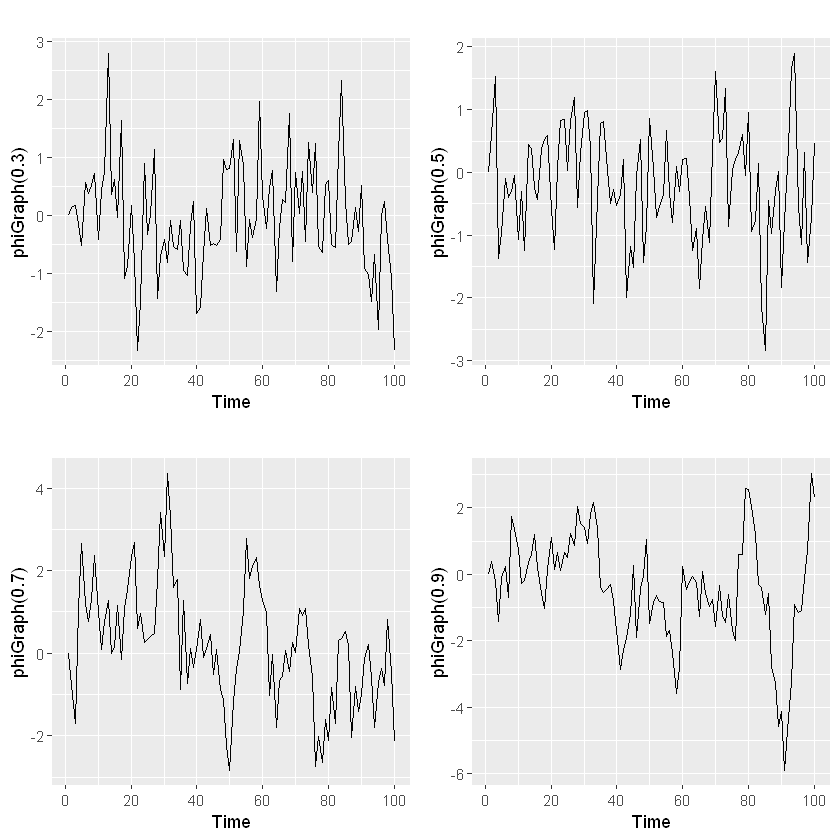

In [22]:
# b. 시계열에 대한 시간 그래프를 그려봅시다. Φ_1  이 변하면 그래프가 어떻게 변합니까?

phiGraph <- function(phi) {
    y <- ts(numeric(100))

    e <- rnorm(100)

    for(i in 2:100){
        y[i] <- phi * y[i-1] + e[i]
    }
    
    return (y)
}

p1 <- autoplot(phiGraph(0.3))
p2 <- autoplot(phiGraph(0.5))
p3 <- autoplot(phiGraph(0.7))
p4 <- autoplot(phiGraph(0.9))

grid.arrange(p1, p2, p3, p4,
    layout_matrix = rbind(
        c(1, 2),
        c(3, 4)))

In [23]:
# c. Φ_1 = 0.6  와 σ^2 = 1  인 MA(1) 모델에서 데이터를 생성하는 코드를 작성해봅시다.



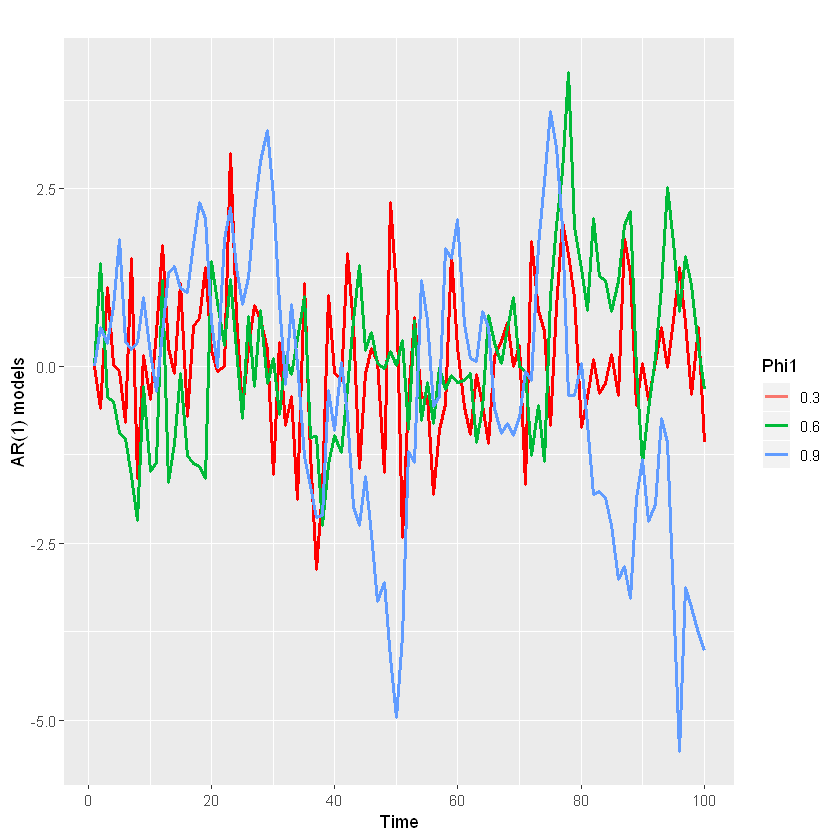

In [5]:
# produce plots changing phi1 value.
autoplot(ar1generator(0.3), series = "0.3") +
  geom_line(size = 1, colour = "red") +
  autolayer(y, series = "0.6", size = 1) +
  autolayer(ar1generator(0.9), size = 1, series = "0.9") +
  ylab("AR(1) models") +
  guides(colour = guide_legend(title = "Phi1"))
# As phi increases, the variation of y increased.

In [6]:
# c. Write your own code to generate data from an MA(1) model with theta1 = 0.6 and sigma^2 = 1.
ma1generator <- function(theta1){
  # generate 100 data points from an MA(1) model with input theta1.
  y <- ts(numeric(100))
  # error 'e's have variation sigma^2 as 1.
  e <- rnorm(100)
  for(i in 2:100){
    y[i] <- theta1*e[i-1] + e[i]
  }
  return(y)
}

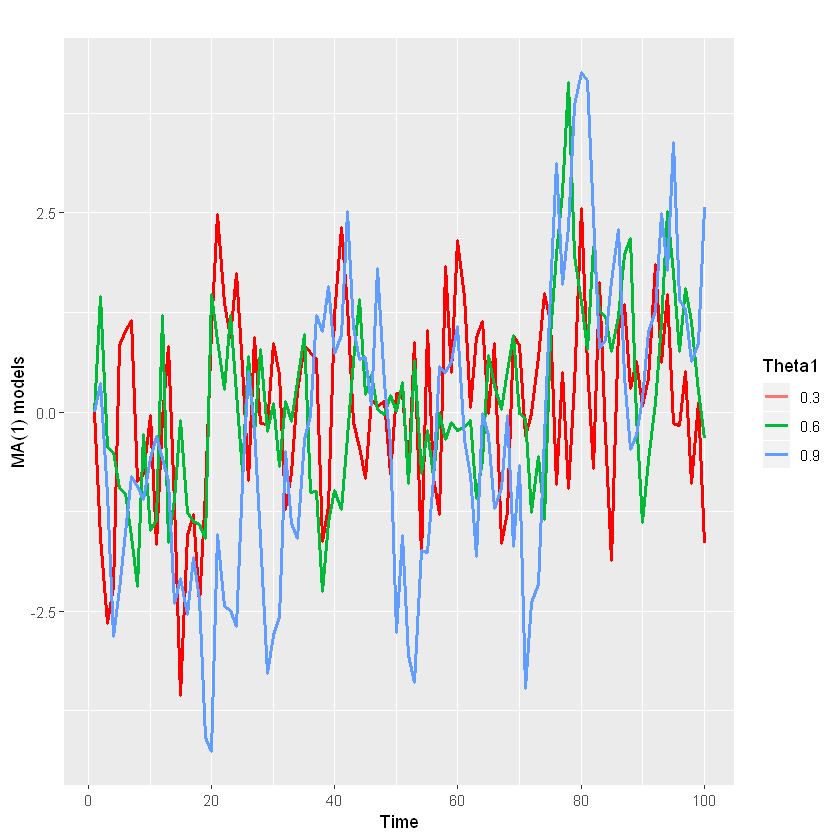

In [7]:
# d. Produce a time plot for the series. How does the plot change as you change theta1?
# produce plots changing theta1 value.
autoplot(ma1generator(0.3), series = "0.3") +
  geom_line(size = 1, colour = "red") +
  autolayer(y, series = "0.6", size = 1) +
  autolayer(ar1generator(0.9), size = 1, series = "0.9") +
  ylab("MA(1) models") +
  guides(colour = guide_legend(title = "Theta1"))
# As theta increases, the variation of y increased.

In [8]:
# e. Generate data from an ARMA(1,1) model with phi1 = 0.6, theta1 = 0.6 and sigma^2 = 1.
y_arima.1.0.1 <- ts(numeric(50))
e <- rnorm(50)
for(i in 2:50){
   y_arima.1.0.1[i] <- 0.6*y_arima.1.0.1[i-1] + 0.6*e[i-1] + e[i]
}

In [9]:
# f. Generate data from an AR(2) model with phi1 = -0.8, phi2 = 0.3 and sigma^2 = 1. (Note that these parameters will give a non-stationary series.)
y_arima.2.0.0 <- ts(numeric(50))
e <- rnorm(50)
for(i in 3:50){
   y_arima.2.0.0[i] <- -0.8*y_arima.2.0.0[i-1] + 0.3*y_arima.2.0.0[i-2] + e[i]
}

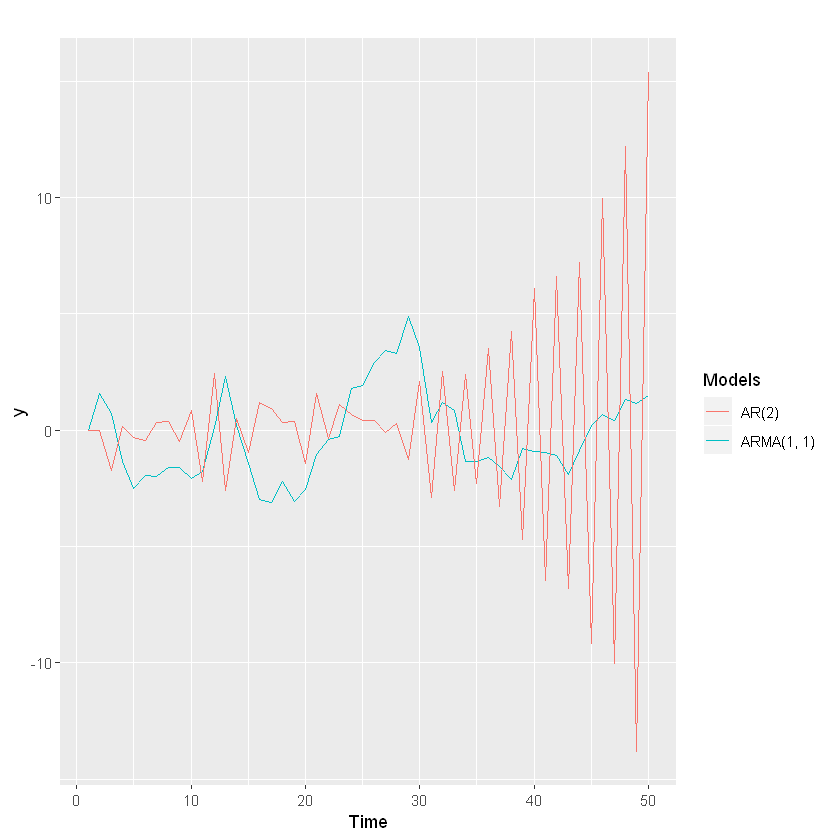

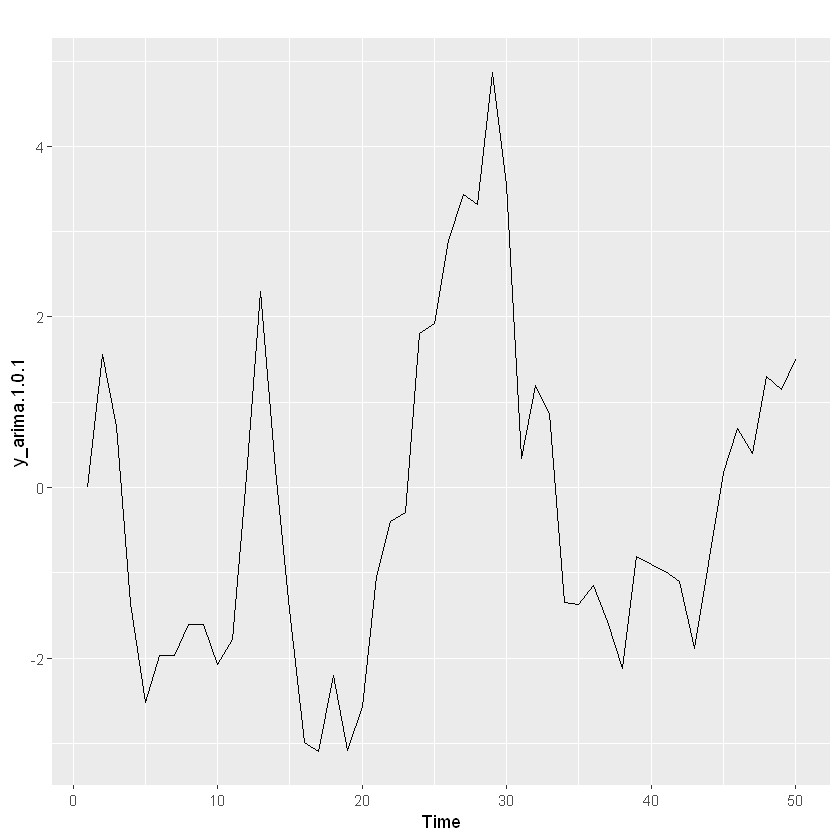

In [10]:
# g. Graph the latter two series and compare them.
autoplot(y_arima.1.0.1, series = "ARMA(1, 1)") +
  autolayer(y_arima.2.0.0, series = "AR(2)") +
  ylab("y") +
  guides(colour = guide_legend(title = "Models"))
autoplot(y_arima.1.0.1)